<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Dolar_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#modelo sarima con el dolar sin variables exogenas
#datasets: dados historicos dolar desde 1987, cotaçoesmoedasperiodoooooo


In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [47]:
!pip install scipy

In [48]:
!pip install pmdarima

In [49]:
from pmdarima.arima import auto_arima

In [50]:
# vamos importar a base de produção de energia elétrica
df = pd.read_excel('/content/DadosHistoricosDolarDesde1985BR.xlsx',index_col='data', parse_dates=True)
df.head()

,valor
data,
2019-02-11,3.7391
2019-02-12,3.7296
2019-02-13,3.7277
2019-02-14,3.7756
2019-02-15,3.7155


In [51]:
# quantas linhas e colunas?
df.shape

(1329, 1)

In [52]:
# Estatística descritiva
df.describe()

,valor
count,1329.000000
mean,4.962675
std,0.533486
min,3.710000
25%,4.830600
50%,5.104200
75%,5.307500
max,5.937200


In [53]:
# Quando começam e terminam os dados?
df.index.min(), df.index.max()

(Timestamp('2019-02-11 00:00:00'), Timestamp('2024-05-28 00:00:00'))

In [54]:
df.columns = ['producao']

<Axes: xlabel='data'>

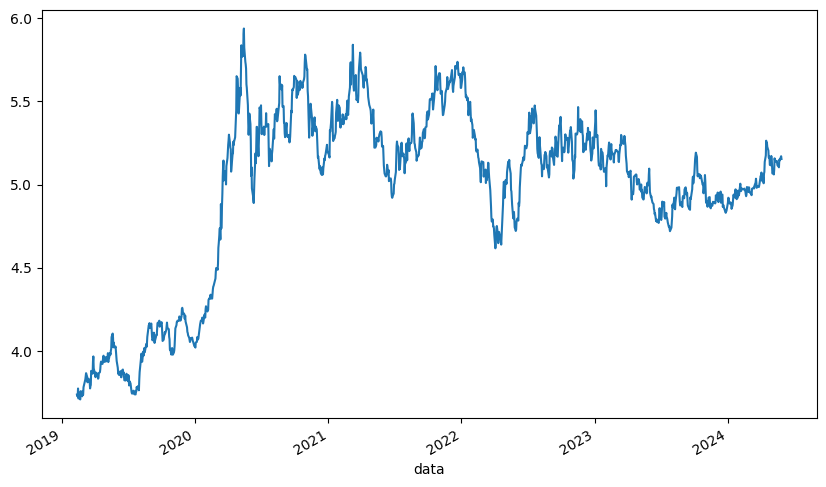

In [55]:
# Vamos dar uma olhada no gráfico de consumo x anos
df['producao'].plot(figsize=(10,6))

In [56]:
# Teste de estacionariedade.
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['producao'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-2.5270832067433195
p-valor:0.10902296915064347


In [57]:
# Teste de estacionariedade.
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['producao'].diff().dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-33.27472581536423
p-valor:0.0


In [58]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True,
                           m=6,
                           D=1,
                           start_P=1,
                           start_Q=1,
                           max_P=2,
                           max_Q=2,
                           information_criterion='aic',
                           trace=True,
                           error_action='ignore',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=11.07 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=-3287.872, Time=0.67 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=-3752.476, Time=1.33 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=10.28 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=-3294.605, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=-3899.273, Time=1.65 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=13.27 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=8.51 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=-3889.946, Time=1.28 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=-3897.332, Time=1.19 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=-3897.231, Time=1.09 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=-3899.308, Time=1.00 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=-3752.561, Time=0.39 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=inf, Time=5.94 sec
 ARIMA(0,1,1)(1,1,1)[6]             : AIC=inf,

In [59]:

# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(0,1,1),  seasonal_order=(1, 1, 2, 6))#0,1,1 en ves de 2,1,0
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
# resultados do modelo SARIMAX(2,1,2)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                 1329
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                2138.567
Date:                                Tue, 02 Jul 2024   AIC                          -4267.134
Time:                                        13:10:39   BIC                          -4241.200
Sample:                                             0   HQIC                         -4257.412
                                               - 1329                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0888      0.021      4.298      0.000       0.048       0.129
ar.S.L6       -0.9593      0.031    -30.699      0.000      -1.021      -0.898
ma.S.L6       -0.0673      0.097     -0.696      0.487      -0.257       0.122
ma.S.L12      -0.9313      0.096     -9.668      0.000      -1.120      -0.743
sigma2         0.0022      0.000     10.621      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               290.05
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:

# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-365)
predicao_media = predicoes.predicted_mean

In [62]:

# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(5.211569498764059, 5.3979440663179)

In [63]:
predicao_media[0]


5.30475678254098

In [64]:

datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

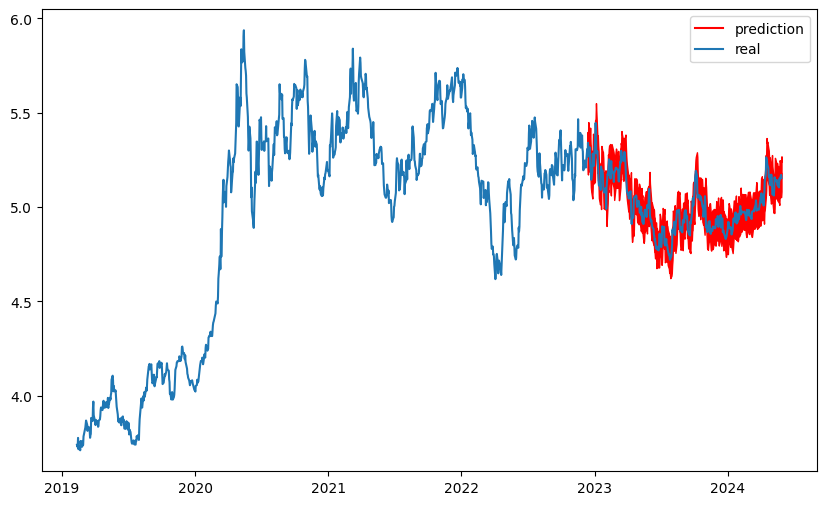

In [65]:


plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [66]:
# Forecast pra 12 values

forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


12

In [67]:
# Intervalo de confiança
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

In [68]:
limites_abaixo[0], limites_acima[0]
predicao_media[0]

5.30475678254098

In [69]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

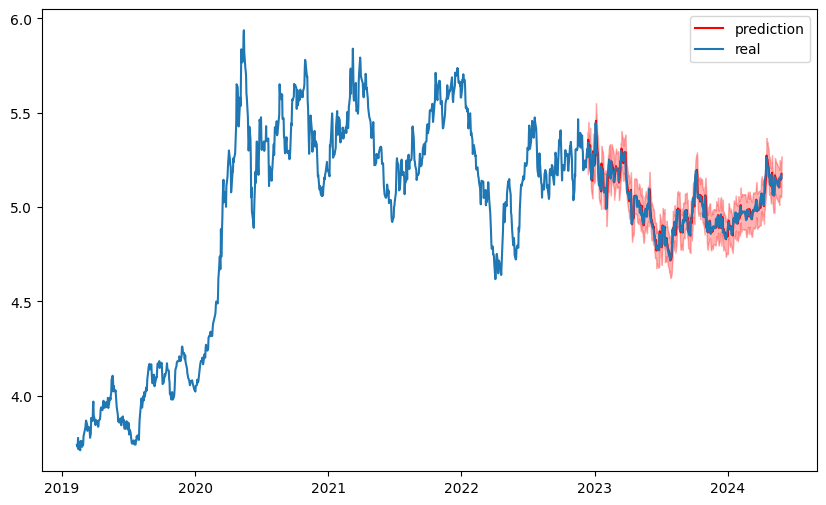

In [70]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao, predicao_media.values, color='red', label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red', alpha=0.3)
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [83]:
# Previsão para 12 dias
forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean

# Imprimir o tamanho das previsões
print("Tamanho de forecast_medio:", len(forecast_medio))
print("Conteúdo de forecast_medio:", forecast_medio)

Tamanho de forecast_medio: 12
Conteúdo de forecast_medio: 1329    5.153570
1330    5.151446
1331    5.151939
1332    5.148665
1333    5.148713
1334    5.152940
1335    5.160483
1336    5.163273
1337    5.164011
1338    5.166230
1339    5.161864
1340    5.164372
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [84]:
# Calculando intervalos de confiança para as 12 previsões futuras
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]


In [87]:
# Ajuste do índice baseado no output
idx_real = intervalo_abaixo_f.index[5]  # O 5º índice na série

In [88]:
# Imprimir o tamanho dos intervalos de confiança
print("Tamanho de intervalo_confianca_forecast:", len(intervalo_confianca_forecast))
print("Conteúdo de intervalo_abaixo_f:", intervalo_abaixo_f)
print("Conteúdo de intervalo_acima_f:", intervalo_acima_f)

Tamanho de intervalo_confianca_forecast: 12
Conteúdo de intervalo_abaixo_f: 1329    5.060462
1330    5.013797
1331    4.980986
1332    4.949912
1333    4.925597
1334    4.907871
1335    4.896074
1336    4.880913
1337    4.864774
1338    4.851017
1339    4.831449
1340    4.819424
Name: lower producao, dtype: float64
Conteúdo de intervalo_acima_f: 1329    5.246678
1330    5.289094
1331    5.322892
1332    5.347419
1333    5.371830
1334    5.398009
1335    5.424891
1336    5.445634
1337    5.463249
1338    5.481442
1339    5.492279
1340    5.509320
Name: upper producao, dtype: float64


In [91]:
print("Índice real usado:", idx_real)
print("Intervalo de confiança abaixo:", intervalo_abaixo_f[idx_real])
print("Intervalo de confiança acima:", intervalo_acima_f[idx_real])
print("Valor de previsão:", forecast_medio[idx_real])

Índice real usado: 1334
Intervalo de confiança abaixo: 4.907871350389653
Intervalo de confiança acima: 5.3980085925524115
Valor de previsão: 5.152939971471032


# funcion automatica


In [92]:
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sarima(data, steps=12, file_name='forecast_results.xlsx'):
    # Ajustar o modelo SARIMA
    model = SARIMAX(data, order=(0, 1, 1), seasonal_order=(1, 1, 2, 6))
    resultado_sarimax = model.fit()

    # Previsão para os próximos 'steps' períodos
    forecast = resultado_sarimax.get_forecast(steps=steps)
    forecast_medio = forecast.predicted_mean
    intervalo_confianca = forecast.conf_int()
    intervalo_abaixo_f = intervalo_confianca.iloc[:, 0]
    intervalo_acima_f = intervalo_confianca.iloc[:, 1]

    # Criar DataFrame com os resultados
    forecast_df = pd.DataFrame({
        'Data': forecast_medio.index,
        'Previsao': forecast_medio.values,
        'Intervalo_Abaixo': intervalo_abaixo_f.values,
        'Intervalo_Acima': intervalo_acima_f.values
    })

    # Salvar os resultados em um arquivo Excel
    forecast_df.to_excel(file_name, index=False)
    print(f"Previsões salvas em {file_name}")

    return forecast_df



In [99]:
# Exemplo de uso:
# Suponha que 'df' seja seu DataFrame de dados históricos
# Você pode chamar a função assim:

# 1. Carregar dados históricos existentes
dff = pd.read_excel('/content/DadosHistoricosDolarDesde1985BR.xlsx', index_col='data', parse_dates=True)

# 2. Atualizar dados com novos dados de junho (supondo que você os tenha em um arquivo separado)
novos_dados_junho = pd.read_excel('/content/CotacoesMoedasPeriodoooooo.xlsx', index_col='data', parse_dates=True)
df = pd.concat([df, novos_dados_junho])


In [102]:
df.tail()

,valor,dolar
data,,
2024-06-25,5.42865,NaN
2024-06-26,5.50940,NaN
2024-06-27,5.52260,NaN
2024-06-28,5.55860,NaN
2024-07-01,5.58900,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2019-02-11 to 2024-07-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   1352 non-null   float64
 1   dolar   69 non-null     float64
dtypes: float64(2)
memory usage: 33.3 KB


In [105]:
dropcolumns = ['dolar']
df.drop(columns=dropcolumns, inplace=True)

In [106]:
df.head()

,valor
data,
2019-02-11,3.7391
2019-02-12,3.7296
2019-02-13,3.7277
2019-02-14,3.7756
2019-02-15,3.7155


In [107]:

# 3. Chamar a função de previsão com os dados atualizados
previsoes = forecast_sarima(df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Previsões salvas em forecast_results.xlsx


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [110]:
previsoes.head(14)

,Data,Previsao,Intervalo_Abaixo,Intervalo_Acima
0,1421,5.592266,5.499267,5.685265
1,1422,5.593968,5.456713,5.731224
2,1423,5.587804,5.417451,5.758158
3,1424,5.592410,5.394417,5.790402
4,1425,5.593447,5.371223,5.815671
5,1426,5.592682,5.348622,5.836743
6,1427,5.592008,5.328822,5.855193
7,1428,5.590240,5.309299,5.871180
8,1429,5.593651,5.296006,5.891295
9,1430,5.596057,5.282599,5.909515


In [112]:
import pandas as pd

# Supondo que 'previsoes' seja o DataFrame com os resultados das previsões
# Aqui estamos convertendo a coluna 'data' para o formato de data padrão do pandas
previsoes['Data'] = pd.to_datetime(previsoes['Data'])

# Salvar DataFrame no Excel
previsoes.to_excel('output_previsoes.xlsx', index=False)


##Intervalo abaixo:
 É o limite inferior do intervalo de confiança. Significa que há uma probabilidade (geralmente de 95%) de que o valor real esteja acima desse limite.

##Intervalo acima:
 É o limite superior do intervalo de confiança. Significa que há uma probabilidade (geralmente de 95%) de que o valor real esteja abaixo desse limite.